In [27]:
import numpy as np
from os import path
import pandas as pd
from random import choice, shuffle

from ga4stpg.graph import ReaderORLibrary
from ga4stpg.condition import BestKnownReached, Stagnation
from ga4stpg.customevol import GeneticEvolution as Evolution
from ga4stpg.customevol import GeneticPopulation as GPopulation
from ga4stpg.graph.reader import read_problem
from ga4stpg.normalization import normalize
from ga4stpg.selector import roullete
from ga4stpg.tracker import DataTracker
from ga4stpg.util import STEIN_B, display, update_best, update_generation

from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedPrimRST
from ga4stpg.tree.mutate import ReplaceByRandomEdge
from ga4stpg.tree.pxcrossover import PXTree


In [35]:
input_file = 'steinb10.txt'

filename = path.join('..', '..', 'datasets','ORLibrary', input_file)
print(filename)

assert path.exists(filename)

reader = ReaderORLibrary()

stpg = reader.parser(filename)

..\..\datasets\ORLibrary\steinb10.txt


In [36]:
crossover = PXTree(stpg)
evaluator = EvaluateTreeGraph(stpg)
generator = GenerateBasedPrimRST(stpg)
mutate = ReplaceByRandomEdge(stpg)

In [37]:
population = (GPopulation(
        chromosomes=[ generator() for _ in range(100)],
        eval_function=evaluator,
        maximize=True)
    .evaluate()
    .normalize(norm_function=normalize)
    .callback(update_best))

In [38]:
len(population)

100

<AxesSubplot:>

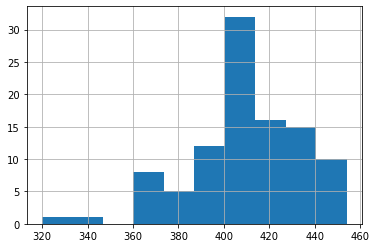

In [39]:
costs = pd.Series([p.cost for p in population])

costs.hist()

In [40]:
def non_selection(population):
    return population

trial 0
164.36 2.022473732833136
trial 1
164.21 2.1830941344797754
trial 2
164.59 2.396226199673144
trial 3
163.84 1.863974248749161
trial 4
164.51 2.3895397046293247


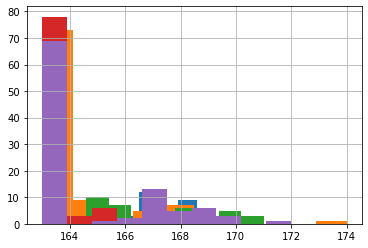

In [41]:
for i in range(5):
    print(f"trial {i}")
    for j in range(100):
        population = (population
                        .select(selection_func=roullete)
                        .crossover(combiner=crossover)
                        .mutate(mutate_function=mutate, probability=0.5)
                        .evaluate()
                        .normalize(norm_function=normalize)
                        .callback(update_best)
                        .callback(update_generation)
                        )
    
    costs = pd.Series([p.cost for p in population])
    costs.hist()
    print(np.mean(costs), np.std(costs))